# Modeling

This notebook uses a wide variety of modeling algorithms for a binary classification problem. It reads a file created from a feature selection process that has a reasonably small number of good variables. 

In [1]:
from datetime import datetime
start_time = datetime.now()

import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
import gc
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
vars = pd.read_csv('vars_final.csv')
print(vars.shape)
vars.head()

(1000000, 27)
CPU times: user 1.82 s, sys: 246 ms, total: 2.07 s
Wall time: 2.1 s


,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30,...,address_unique_count_for_dob_homephone_60,address_unique_count_for_name_dob_60,fulladdress_unique_count_for_ssn_name_dob_60,fulladdress_unique_count_for_ssn_dob_60,fulladdress_unique_count_for_name_60,address_unique_count_for_homephone_name_dob_30,address_unique_count_for_ssn_dob_60,fulladdress_unique_count_for_name_homephone_30,record,fraud_label
0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0
3,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0
4,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0


In [3]:
# set the number of variables, and set the names of the y and record number y
NVARS = 10

vars.rename(columns={'record':'Recnum'},inplace=True)
vars.rename(columns={'fraud_label':'Fraud'},inplace=True)
numvars = min(NVARS,len(vars)-2)
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(vars.columns[i])
    
final_vars_list

['Recnum',
 'Fraud',
 'fulladdress_day_since',
 'ssn_dob_day_since',
 'fulladdress_unique_count_for_ssn_name_30',
 'zip5_unique_count_for_fulladdress_dob_1',
 'fulladdress_count_7',
 'ssn_firstname_count_30',
 'fulladdress_unique_count_for_name_homephone_60',
 'name_dob_day_since',
 'fulladdress_unique_count_for_ssn_homephone_30',
 'address_unique_count_for_ssn_lastname_30']

In [4]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
0,1.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
1,2.0,1.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
2,3.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
3,4.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
4,5.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0


In [5]:
vars.shape

(1000000, 12)

In [6]:
vars['Fraud'].sum()

14393.0

In [7]:
vars.head(10)

,Recnum,Fraud,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
0,1.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
1,2.0,1.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
2,3.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
3,4.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
4,5.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
5,6.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
6,7.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
7,8.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
8,9.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0
9,10.0,0.0,365.0,365.0,1.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0


In [8]:
vars.shape

(1000000, 12)

In [9]:
vars.describe()

,Recnum,Fraud,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,0.014393,325.060480,331.251789,1.036330,1.512221,1.039021,1.048997,1.041170,331.076437,1.037871,1.049686
std,288675.278933,0.119104,99.097485,92.025077,0.608106,0.964342,0.581254,0.499156,0.615174,92.213005,0.609320,0.638950
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,250000.750000,0.000000,365.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
50%,500000.500000,0.000000,365.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
75%,750000.250000,0.000000,365.000000,365.000000,1.000000,2.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
max,1000000.000000,1.000000,365.000000,365.000000,30.000000,33.000000,30.000000,34.000000,30.000000,365.000000,30.000000,30.000000


In [10]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


## Scale and truncate field values

In [11]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,325.060480,331.251789,1.036330,1.512221,1.039021,1.048997,1.041170,331.076437,1.037871,1.049686
std,99.097485,92.025077,0.608106,0.964342,0.581254,0.499156,0.615174,92.213005,0.609320,0.638950
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,365.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
50%,365.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
75%,365.000000,365.000000,1.000000,2.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000
max,365.000000,365.000000,30.000000,33.000000,30.000000,34.000000,30.000000,365.000000,30.000000,30.000000


In [12]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [13]:
# cap the variables
Clip = 10

In [14]:
# push in any outlier values, then rescale
X.clip(-1*Clip,Clip,inplace=True)
# Now redo the zscaling after clipping
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,-4.623209e-14,7.399228e-13,4.017832e-14,1.413739e-14,2.796835e-14,8.483891e-14,2.264667e-14,7.863955e-13,5.952217e-14,2.320103e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.280209e+00,-3.599582e+00,-5.974291e-02,-5.311611e-01,-6.713239e-02,-9.815973e-02,-6.692412e-02,-3.590344e+00,-6.215287e-02,-7.776190e-02
25%,4.030326e-01,3.667284e-01,-5.974291e-02,-5.311611e-01,-6.713239e-02,-9.815973e-02,-6.692412e-02,3.678826e-01,-6.215287e-02,-7.776190e-02
50%,4.030326e-01,3.667284e-01,-5.974291e-02,-5.311611e-01,-6.713239e-02,-9.815973e-02,-6.692412e-02,3.678826e-01,-6.215287e-02,-7.776190e-02
75%,4.030326e-01,3.667284e-01,-5.974291e-02,5.058153e-01,-6.713239e-02,-9.815973e-02,-6.692412e-02,3.678826e-01,-6.215287e-02,-7.776190e-02
max,4.030326e-01,3.667284e-01,4.762934e+01,3.265209e+01,4.982496e+01,6.601346e+01,4.707419e+01,3.678826e-01,4.753187e+01,4.530917e+01


In [15]:
# separate data into modeling (traintest) and out of time. 
oot_recnum=833507
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

## Explore regularization

Solve a linear regression with ridge and lasso regularization and watch how the variable weights evolve with the regularization strength

In [16]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error

In [17]:
alphas = 10**np.linspace(2,9,30)*0.5

In [18]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

In [19]:
ridge = Ridge()
coefs = []
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(ridge.coef_) 
np.shape(coefs)

(30, 10)

CPU times: user 1.25 s, sys: 328 ms, total: 1.58 s
Wall time: 587 ms


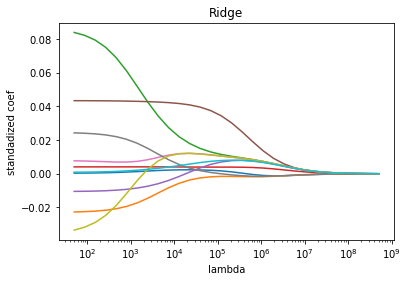

In [20]:
%%time
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda') 
plt.ylabel('standadized coef') 
plt.title('Ridge')
plt.savefig('ridge.png')

In [21]:
alphas = 10**np.linspace(-5,0,30)*0.5

In [22]:
%%time
# sometimes this cell takes a long time
lasso = Lasso(max_iter=10000) 
coefs = [] 
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(lasso.coef_) 
print('Selected Features:', list(vars.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: []
CPU times: user 4min 43s, sys: 34 s, total: 5min 17s
Wall time: 1min 7s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


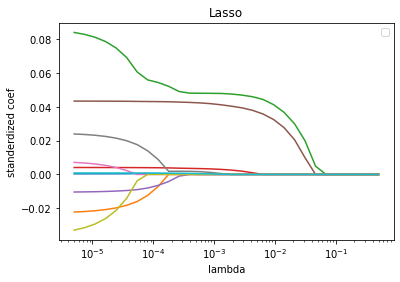

In [23]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance 
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('standerdized coef') 
plt.title('Lasso')
plt.legend()
plt.savefig('lasso.png')

## Look at PCA

In [24]:
len(X_trntst.columns)

10

In [25]:
X_trntst_save = X_trntst.copy()

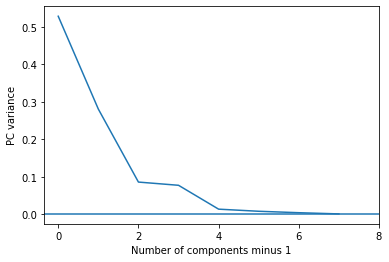

In [26]:
pca = PCA(n_components = .999, svd_solver = 'full')
pca.fit(X_trntst)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components minus 1')
plt.ylabel('PC variance')
plt.xticks(np.arange(0, len(X_trntst.columns), step=2))
plt.axhline(y=0,xmin=0,xmax=len(X_trntst.columns))
X_trntst = X_trntst_save.copy()

In [27]:
# We look at the above picture, select how many PCs we want to keep, and then redo the PCA with just this many PCs
pca = PCA(n_components = 6, svd_solver = 'full')
princ_comps = pca.fit_transform(X_trntst)
X_trntst_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
X_trntst_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.03656
1,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.03656
2,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.03656
3,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.03656
4,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.03656


In [28]:
princ_comps = pca.transform(X_oot)
X_oot_orig_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)],index=X_oot.index)
X_oot_orig_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
833507,0.188913,3.688661,-1.069880,-0.358285,-0.161838,0.003975
833508,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.036560
833509,0.476941,6.218155,0.323852,-0.428560,0.047270,0.058745
833510,-0.347425,-0.563333,0.024623,-0.488242,-0.039337,-0.036560
833511,-0.104597,-0.605831,0.098079,0.515525,-0.022454,-0.005682


In [29]:
X_trntst.describe()

,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30
count,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000
mean,0.031522,0.029783,0.000864,-0.000180,0.001151,-0.001755,0.000609,0.029945,0.000806,0.000425
std,0.981263,0.978431,1.005772,1.007114,1.011495,0.979541,1.004564,0.978420,1.005706,1.002959
min,-3.280209,-3.599582,-0.059743,-0.531161,-0.067132,-0.098160,-0.066924,-3.590344,-0.062153,-0.077762
25%,0.403033,0.366728,-0.059743,-0.531161,-0.067132,-0.098160,-0.066924,0.367883,-0.062153,-0.077762
50%,0.403033,0.366728,-0.059743,-0.531161,-0.067132,-0.098160,-0.066924,0.367883,-0.062153,-0.077762
75%,0.403033,0.366728,-0.059743,0.505815,-0.067132,-0.098160,-0.066924,0.367883,-0.062153,-0.077762
max,0.403033,0.366728,47.629338,32.652086,49.824961,66.013459,47.074188,0.367883,47.531867,45.309167


In [30]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000
mean,0.030074,0.306888,-0.070671,0.011509,0.011971,0.007169
std,2.182737,1.840081,1.051120,0.866620,0.409699,0.316926
min,-0.347425,-12.059460,-1.514561,-14.450421,-6.829801,-3.087666
25%,-0.347425,-0.605831,0.024623,-0.488242,-0.039337,-0.036560
50%,-0.156035,-0.563333,0.024623,-0.488242,-0.039337,-0.026805
75%,0.107264,-0.062799,0.098079,0.515525,-0.022454,0.002293
max,109.907287,18.025702,53.012187,28.732615,6.233921,24.335026


In [31]:
# zscale the PCs
mean = X_trntst_pca.mean()
stdev = X_trntst_pca.std()
X_trntst_pca = (X_trntst_pca - mean)/stdev
X_oot_orig_pca = (X_oot_orig_pca - mean)/stdev

In [32]:
X_trntst_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05
mean,1.754419e-13,-1.729665e-12,-6.682987e-14,-7.712691e-14,-3.161671e-13,5.891066e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.517450e-01,-7.201993e+00,-1.696678e+00,-1.801473e+01,-1.678785e+01,-1.368463e+01
25%,-1.517450e-01,-3.630861e-01,2.668739e-02,-5.578352e-01,-1.074339e-01,-1.308092e-01
50%,-1.517450e-01,-3.376163e-01,2.668739e-02,-5.578352e-01,-1.074339e-01,-1.308092e-01
75%,-4.568489e-02,-3.376163e-01,1.063040e-01,5.890070e-01,-6.132450e-02,-2.032821e-02
max,4.789827e+01,1.282581e+01,6.776158e+01,3.614112e+01,2.185205e+01,7.253539e+01


In [33]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000
mean,0.013135,0.183924,-0.076598,0.013150,0.032695,0.025650
std,0.953357,1.102795,1.139267,0.990147,1.118924,1.133934
min,-0.151745,-7.227463,-1.641572,-16.510165,-18.652783,-11.047403
25%,-0.151745,-0.363086,0.026687,-0.557835,-0.107434,-0.130809
50%,-0.068151,-0.337616,0.026687,-0.557835,-0.107434,-0.095905
75%,0.046850,-0.037637,0.106304,0.589007,-0.061325,0.008206
max,48.004332,10.803144,57.457792,32.828123,17.025382,87.068625


In [34]:
X_trntst_pca.shape

(833507, 6)

In [35]:
X_oot_orig_pca.shape

(166493, 6)

## Subsample the larger class if desired

In [36]:
# set the ratio of goods to bads that you would like. This next line is the ratio of goods to bads that you want for modeling
sample_ratio_desired = 1

temp = X_trntst.copy()
temp['Fraud'] = Y_trntst['Fraud']
temp.head()
goods = temp[temp['Fraud']==0]
bads = temp[temp['Fraud']==1]
actual_bad_fraction = len(bads)/len(temp)
actual_good_fraction = 1 - actual_bad_fraction
print(actual_bad_fraction)
fraction = sample_ratio_desired * actual_bad_fraction
goods_sampled = goods.sample(frac = fraction)
all_sampled = pd.concat([goods_sampled,bads])
all_sampled.sort_index(inplace=True)
Y_trntst_sampled = pd.DataFrame(all_sampled['Fraud'])
X_trntst_sampled = all_sampled.drop(columns=['Fraud'])
del [temp,goods,bads,all_sampled]
gc.collect()
print(X_trntst_sampled.shape,len(Y_trntst_sampled))

0.0144053979150745
(23841, 10) 23841


In [37]:
niter = 0
nitermax = 5
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models

You can comment in/out any of these model cells and just explore one model type. You can also just rerun that single cell multiple times (hit shift-enter on that cell) as you manually explore different model hyperparameters.

In [38]:
Modeling_output = pd.DataFrame(columns=['Model','Trn','Tst','OOT'],index=range(1000))
counter = 0
model_counter = 0

In [39]:
%%time
# Logistic regression

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(max_iter=20,)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['log reg',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5156643860280878 0.5040805223068553 0.48826487845766975
1 0.5081106870229007 0.5200110405741099 0.4886839899413244
2 0.5094610778443114 0.5170905113480996 0.4878457669740151
3 0.5130403715612719 0.5088642659279778 0.4878457669740151
4 0.5121111374970316 0.5143654114365411 0.4895222129086337
trn    0.511678
tst    0.512882
oot    0.488433
dtype: float64
CPU times: user 33.3 s, sys: 10.5 s, total: 43.9 s
Wall time: 6.98 s


In [40]:
%%time
# Single DT

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10,min_samples_split=20,min_samples_leaf=10)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['DT',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.549121117264628 0.5474196163199135 0.5180217937971501
1 0.5530285175583314 0.5362113036069298 0.5167644593461861
2 0.550041552890894 0.5477120535714286 0.5188600167644594
3 0.5471182412358883 0.5453786191536748 0.5180217937971501
4 0.5446087786259542 0.5569969638421198 0.5171835708298408
trn    0.548784
tst    0.546744
oot    0.517770
dtype: float64
CPU times: user 4 s, sys: 266 ms, total: 4.26 s
Wall time: 3.51 s


In [41]:
##### %%time
# RF

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(criterion = 'entropy', n_estimators=50,max_depth=10,
                                   min_samples_split=20,min_samples_leaf=10)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['RF',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5476532567049809 0.5584131326949384 0.5255658005029338
1 0.5563095238095238 0.5436650956473523 0.5255658005029338
2 0.5566997964315651 0.5421225382932167 0.5264040234702431
3 0.5565778468156292 0.5450797141286421 0.5259849119865885
4 0.5512380049757137 0.5538418395961862 0.5251466890192791
trn    0.553696
tst    0.548624
oot    0.525733
dtype: float64


In [42]:
%%time
# LGBM

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(max_depth = 20, num_leaves= 100, n_estimators=500)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5631604226705091 0.5400924164175047 0.5234702430846605
1 0.5645566590881895 0.5367123287671233 0.5205364626990779
2 0.5619579422597125 0.5448467966573816 0.5230511316010059
3 0.5633736081497276 0.5405329593267882 0.5184409052808047
4 0.561863696251048 0.5410060142154183 0.5167644593461861
trn    0.562982
tst    0.540638
oot    0.520453
dtype: float64
CPU times: user 20min 59s, sys: 1min 5s, total: 22min 4s
Wall time: 3min 22s


In [43]:
%%time
# NN

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(100), activation = 'logistic', alpha = 0.001, 
                          solver = 'adam', learning_rate = 'adaptive', learning_rate_init = 0.001)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5513731060606061 0.534981736442821 0.5222129086336965
1 0.5462654614652712 0.548763545429286 0.5234702430846605
2 0.5459497868308858 0.5481335952848723 0.5226320201173512
3 0.5436522154544369 0.554485415520088 0.5222129086336965
4 0.5488051361312567 0.5422691879866518 0.5209555741827326
trn    0.547209
tst    0.545727
oot    0.522297
dtype: float64
CPU times: user 33min 34s, sys: 10min 51s, total: 44min 26s
Wall time: 7min 6s


In [44]:
%%time
# NN on pc's

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst_pca, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(2))

    X_oot = X_oot_orig_pca.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN_PCs',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5526222327453534 0.5331460674157303 0.5226320201173512
1 0.5407239819004525 0.5342200055417013 0.5125733445096395
2 0.5424210152644657 0.545556805399325 0.5159262363788768
3 0.5403550295857988 0.5220691594039921 0.5067057837384744
4 0.5444220986631965 0.5306696679797411 0.510896898575021
trn    0.544109
tst    0.533132
oot    0.513747
dtype: float64
CPU times: user 9min 59s, sys: 3min 17s, total: 13min 16s
Wall time: 1min 59s


In [45]:
%%time
# GBC

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = GradientBoostingClassifier(criterion = 'friedman_mse', max_depth=10,
                                       n_estimators=600, min_samples_split = 40,
                                       min_samples_leaf = 20)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['GBC',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.572403880704276 0.541279387643521 0.5180217937971501
1 0.5703889286566451 0.5484137931034483 0.5176026823134954
2 0.5729339332228274 0.541420949171581 0.5150880134115675
3 0.5742492314968077 0.5409974640743872 0.5150880134115675
4 0.5751413788954398 0.5362554112554112 0.5201173512154234
trn    0.573023
tst    0.541673
oot    0.517184
dtype: float64
CPU times: user 24min 39s, sys: 8.34 s, total: 24min 47s
Wall time: 25min 6s


In [46]:
%%time
# Catboost

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose=0, max_depth=2, iterations=5)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5233521431144195 0.5078847199564981 0.49161777032690696
1 0.5167498218104063 0.5332961827807189 0.49371332774518023
2 0.5154179715731149 0.5322537112010797 0.49371332774518023
3 0.5243727598566308 0.5149848776464119 0.49371332774518023
4 0.5188422917897224 0.5237154150197628 0.49371332774518023
trn    0.519747
tst    0.522427
oot    0.493294
dtype: float64
CPU times: user 5.46 s, sys: 583 ms, total: 6.05 s
Wall time: 3.61 s


In [47]:
%%time
# NOTE this cell has been substantially modified to evaluate a sampled trn/tst data set. 
# Only use this cell if you do downsampling of the goods.
# each good needs to have a weight of (1-actual_ratio)/sample_ratio_desired
# it's hard to get the correct FDR@3% for the actual train and test, so I just use the original trntst after the model is built for evaluation

xmult = actual_good_fraction / (actual_bad_fraction * sample_ratio_desired)
print(xmult)
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst_sampled, Y_trntst_sampled, test_size = .3)

    model = CatBoostClassifier(verbose=0, max_depth=2, iterations=5)

    model.fit(X_trn, Y_trn.values.ravel())  
    
    X_oot = X_oot_orig.copy()
    X_trn = X_trntst.copy()
    Y_trn = Y_trntst.copy()
    X_tst = X_trntst.copy()
    Y_tst = Y_trntst.copy()


    predictions = model.predict_proba(X_trntst)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trntst['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_trntst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_trntst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost_sampled',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

68.41842258682435
0 0.5318564170900308 0.5318564170900308 0.5037720033528919
1 0.5334388273507121 0.5334388273507121 0.5054484492875104
2 0.5341883901057717 0.5341883901057717 0.5104777870913663
3 0.5344382443574581 0.5344382443574581 0.5104777870913663
4 0.5326059798450904 0.5326059798450904 0.5075440067057837
trn    0.533306
tst    0.533306
oot    0.507544
dtype: float64
CPU times: user 3.61 s, sys: 330 ms, total: 3.94 s
Wall time: 3.29 s


In [48]:
%%time
# Catboost on pc's

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst_pca, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose=0, max_depth=2, iterations=5)


    X_oot = X_oot_orig_pca.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost_PCs',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5306752106324908 0.5284916201117319 0.5075440067057837
1 0.5276285952977682 0.5319735391400221 0.5046102263202011
2 0.5331832187722209 0.5259176239843093 0.5046102263202011
3 0.5402042493250382 0.5364105504587156 0.512154233025985
4 0.5272641062114747 0.5189022682721927 0.5037720033528919
trn    0.531791
tst    0.528339
oot    0.506538
dtype: float64
CPU times: user 4.85 s, sys: 326 ms, total: 5.17 s
Wall time: 3.05 s


In [49]:
%%time
# unsupervised model using pc's. 

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst_pca, Y_trntst, test_size = .3)

    X_oot = X_oot_orig_pca.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    pow = 2
    oop = 1/pow
    predictions = ((X_trn.abs()**pow).sum(axis=1))**oop
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = ((X_tst.abs()**pow).sum(axis=1))**oop
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = ((X_oot.abs()**pow).sum(axis=1))**oop
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['unsupervised outliers',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5095821925961195 0.5088740987243483 0.4773679798826488
1 0.5132368513942817 0.5 0.4773679798826488
2 0.5097410311237823 0.5087768180551686 0.4773679798826488
3 0.5129372304743651 0.5015031429352282 0.4773679798826488
4 0.5089477451682176 0.5097931034482759 0.4773679798826488
trn    0.510889
tst    0.505789
oot    0.477368
dtype: float64
CPU times: user 1.49 s, sys: 37.3 ms, total: 1.53 s
Wall time: 1.54 s


In [50]:
%%time
# XGB

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = xgb.XGBClassifier(booster = 'gbtree', tree_method = 'hist', max_depth= 2,
                              min_child_weight = 2, n_estimators=10)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['XGB',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5253346080305927 0.5416323165704864 0.5058675607711651
1 0.5262404580152672 0.5222191553960805 0.49958088851634536
2 0.5280699680888784 0.511844331641286 0.4966471081307628
3 0.5186549429657795 0.531885268727374 0.4966471081307628
4 0.528471646738487 0.5168539325842697 0.49958088851634536
trn    0.525354
tst    0.524887
oot    0.499665
dtype: float64
CPU times: user 28.8 s, sys: 4.95 s, total: 33.8 s
Wall time: 5.71 s


## Model comparison plots

In [51]:
df = Modeling_output.dropna()
df.head(20)

,Model,Trn,Tst,OOT
0,log reg,0.515664,0.504081,0.488265
1,log reg,0.508111,0.520011,0.488684
2,log reg,0.509461,0.517091,0.487846
3,log reg,0.51304,0.508864,0.487846
4,log reg,0.512111,0.514365,0.489522
5,DT,0.549121,0.54742,0.518022
6,DT,0.553029,0.536211,0.516764
7,DT,0.550042,0.547712,0.51886
8,DT,0.547118,0.545379,0.518022
9,DT,0.544609,0.556997,0.517184


In [52]:
df.shape

(60, 4)

In [53]:
df_unpivot = df.melt( id_vars='Model', value_vars=['Trn','Tst','OOT'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,log reg,Trn,0.515664
1,log reg,Trn,0.508111
2,log reg,Trn,0.509461
3,log reg,Trn,0.51304
4,log reg,Trn,0.512111


In [54]:
df_compare = df_unpivot[(df_unpivot['Type']=='Trn') | (df_unpivot['Type']=='Tst') | (df_unpivot['Type']=='OOT')]
df_compare.head()

,Model,Type,Value
0,log reg,Trn,0.515664
1,log reg,Trn,0.508111
2,log reg,Trn,0.509461
3,log reg,Trn,0.51304
4,log reg,Trn,0.512111


In [55]:
output = df.groupby('Model').agg({'Trn':['mean','std'],'Tst':['mean','std'],'OOT':['mean','std']})
output

Trn                 Tst                 OOT  \
                           mean       std      mean       std      mean   
Model                                                                     
DT                     0.548784  0.003159  0.546744  0.007405  0.517770   
GBC                    0.573023  0.001825  0.541673  0.004343  0.517184   
LGBM                   0.562982  0.001114  0.540638  0.002897  0.520453   
NN                     0.547209  0.002959  0.545727  0.007402  0.522297   
NN_PCs                 0.544109  0.005024  0.533132  0.008426  0.513747   
RF                     0.553696  0.004084  0.548624  0.007115  0.525733   
XGB                    0.525354  0.003961  0.524887  0.011949  0.499665   
cat boost              0.519747  0.003967  0.522427  0.010991  0.493294   
cat boost_PCs          0.531791  0.005286  0.528339  0.006582  0.506538   
cat boost_sampled      0.533306  0.001080  0.533306  0.001080  0.507544   
log reg                0.511678  0.002982  0.512882  0.006410  0.488433   
unsupervised outliers  0.510889  0.002031  0.505789  0.004646  0.477368   

                                 
                            std  
Model                            
DT                     0.000817  
GBC                    0.002137  
LGBM                   0.002895  
NN                     0.000909  
NN_PCs                 0.005974  
RF                     0.000478  
XGB                    0.003765  
cat boost              0.000937  
cat boost_PCs          0.003451  
cat boost_sampled      0.002993  
log reg                0.000701  
unsupervised outliers  0.000000

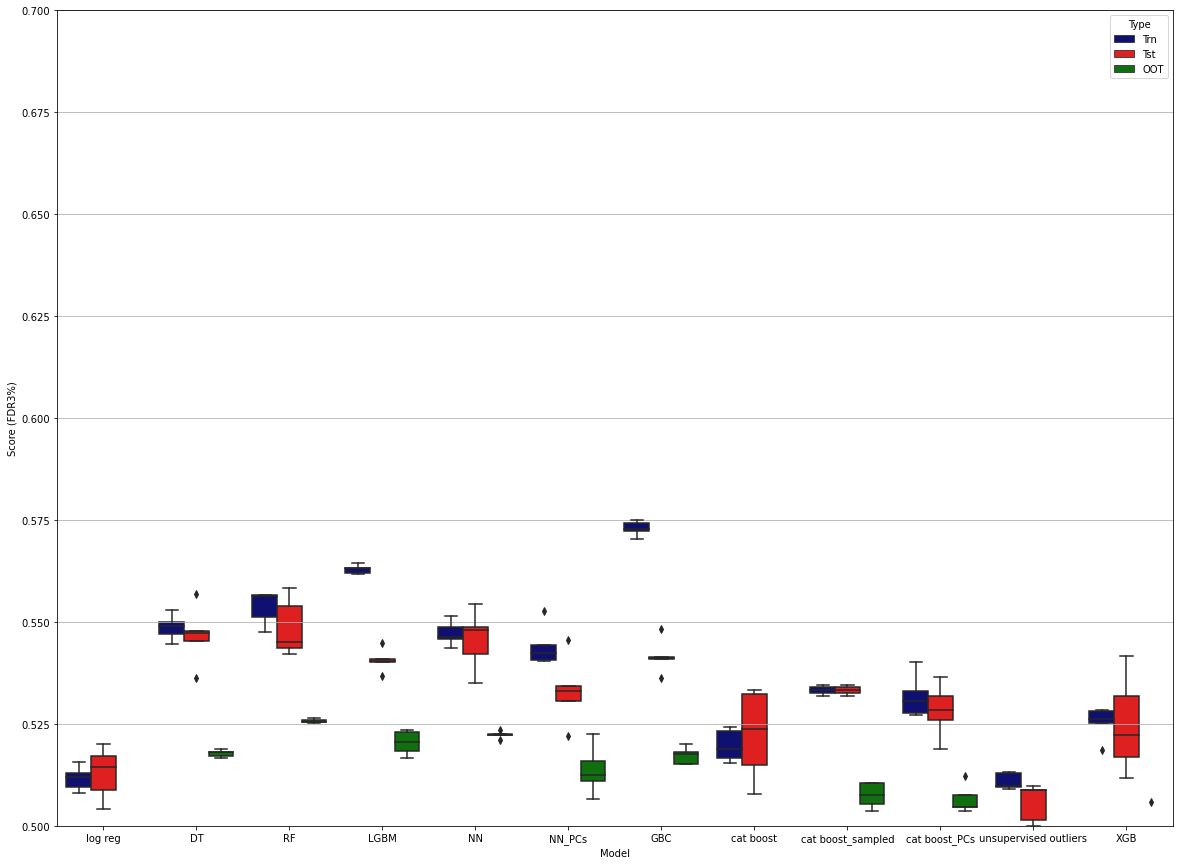

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','r','g'])

plt.ylim(.5,.7)
plt.ylabel('Score (FDR3%)')
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [57]:
print('duration: ', datetime.now() - start_time)

duration:  0:40:24.283037


The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like (due to the stochastic nature of some ML algorithms, but you can't change from your best hyperparameters.

In [58]:
%%time

for niter in range(30):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(max_depth = 6, num_leaves= 6, n_estimators=400)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.5504844169487568 0.5613372093023256 0.5280804694048616
1 0.5501964987495535 0.5584487534626039 0.527661357921207
2 0.5527536576662305 0.5552777777777778 0.5293378038558256
3 0.5540717777512817 0.5505524861878454 0.528918692372171
4 0.5560473740878096 0.5466008771929824 0.5284995808885163
trn    0.552711
tst    0.554443
oot    0.528500
dtype: float64
CPU times: user 4min 14s, sys: 18.1 s, total: 4min 32s
Wall time: 49 s


In [59]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [60]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,fulladdress_day_since,ssn_dob_day_since,fulladdress_unique_count_for_ssn_name_30,zip5_unique_count_for_fulladdress_dob_1,fulladdress_count_7,ssn_firstname_count_30,fulladdress_unique_count_for_name_homephone_60,name_dob_day_since,fulladdress_unique_count_for_ssn_homephone_30,address_unique_count_for_ssn_lastname_30,predicted,Fraud
957048,-3.270118,-3.577849,18.029219,1.542792,18.857455,31.955958,19.439743,-3.568655,17.990751,17.137970,1.000000,0.0
984235,-3.280209,-3.534382,13.095865,7.764651,13.696204,1.905223,12.937520,-3.525278,13.067232,12.442770,1.000000,1.0
995653,-3.280209,-3.447449,32.829278,21.245345,34.341208,1.905223,32.444187,-3.438522,32.761309,31.223569,1.000000,1.0
948787,-3.280209,-3.588715,16.384768,6.727674,18.857455,1.905223,16.188632,-3.579500,16.349578,15.572903,1.000000,1.0
983831,-3.239845,-3.556115,16.384768,0.505815,6.814536,1.905223,16.188632,-3.546966,16.349578,15.572903,1.000000,1.0
983310,-3.169207,-3.480049,16.384768,0.505815,-0.067132,3.908605,16.188632,-3.471055,16.349578,15.572903,0.999999,1.0
925137,-3.179298,-3.490916,-0.059743,-0.531161,-0.067132,17.932282,-0.066924,-3.481900,-0.062153,-0.077762,0.999999,1.0
909416,-3.199481,-3.512649,-0.059743,-0.531161,-0.067132,15.928899,-0.066924,-3.503589,-0.062153,-0.077762,0.999999,1.0
980888,-3.270118,-3.523516,21.318121,3.616745,22.298289,1.905223,21.065298,-3.514433,21.273098,20.268103,0.999999,1.0
849348,-3.280209,-3.599582,-0.059743,0.505815,6.814536,15.928899,-0.066924,-3.590344,-0.062153,-0.077762,0.999998,1.0


In [61]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,1665.0,476.0,1189.0,28.588589,71.411411,1665.0,476.0,1189.0,0.290055,49.832355,49.542301,0.400336
2,2.0,1665.0,1613.0,52.0,96.876877,3.123123,3330.0,2089.0,1241.0,1.272950,52.011735,50.738785,1.683320
3,3.0,1665.0,1645.0,20.0,98.798799,1.201201,4995.0,3734.0,1261.0,2.275345,52.849958,50.574613,2.961142
4,4.0,1665.0,1654.0,11.0,99.339339,0.660661,6660.0,5388.0,1272.0,3.283224,53.310981,50.027757,4.235849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,1665.0,1657.0,8.0,99.519520,0.480480,159833.0,157485.0,2348.0,95.964828,98.407376,2.442549,67.071976
97,97.0,1665.0,1658.0,7.0,99.579580,0.420420,161498.0,159143.0,2355.0,96.975144,98.700754,1.725610,67.576645
98,98.0,1665.0,1653.0,12.0,99.279279,0.720721,163163.0,160796.0,2367.0,97.982414,99.203688,1.221274,67.932404
99,99.0,1665.0,1653.0,12.0,99.279279,0.720721,164828.0,162449.0,2379.0,98.989684,99.706622,0.716938,68.284573


In [62]:
FDR3.to_csv('FDR3.csv')

In [63]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [64]:
print("duration: ", datetime.now() - start_time)

duration:  0:41:18.858446
